In [13]:
import pandas as pd
import seaborn as sns
import numpy as nm
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("Preplacementdata.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


### 1.Replace the NaN values with correct value. And justify why you have chosen the same.

In [3]:
# Replaced the NAN value with 0 because for not placed people salary should only in zero
#dataset.fillna({"salary": 0}, inplace=True)

In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

### 2.How many of them are not placed?

In [5]:
status=dataset[dataset["status"]=="Not Placed"].shape[0]
print(f"Number of Not Placed entries: {status}")

Number of Not Placed entries: 67


### 3.Find the reason for non placement from the dataset?

In [6]:
#splitting categorial and numerical datatype columns
def quanQual(dataset):
    quan=[]
    qual=[]
    for columname in dataset.columns:
        if (dataset[columname].dtype=='O'):
            qual.append(columname)
        else:
            quan.append(columname)
    return quan,qual


In [7]:
quan,qual=quanQual(dataset)

In [8]:
# Filter rows where salary > 0 and salary == 0
placed = dataset[dataset['salary'] > 0]
not_placed = dataset[dataset['salary'] == 0]

# Define the descriptive DataFrame
descriptive = pd.DataFrame(index=["Mean", "Median", "Mode","Q1:25%","Q2:50%",
                               "Q3:75%","99%","Q4:100%"], columns=quan)

# Calculate statistics for both 'placed' and 'not_placed' datasets
for columnName in quan:
    # For 'placed' dataset
    descriptive.loc["Mean", columnName] = placed[columnName].mean()
    descriptive.loc["Median", columnName] = placed[columnName].median()
    descriptive.loc["Mode", columnName] = placed[columnName].mode()[0]
    descriptive.loc["Q1:25%", columnName] = placed.describe()[columnName]["25%"]
    descriptive.loc["Q2:50%", columnName] = placed.describe()[columnName]["50%"]
    descriptive.loc["Q3:75%", columnName] = placed.describe()[columnName]["75%"]
    descriptive.loc["99%", columnName] = nm.percentile(placed[columnName],99)
    descriptive.loc["Q4:100%", columnName] = placed.describe()[columnName]["max"]

    # For 'not_placed' dataset
    descriptive.loc["Mean (Not Placed)", columnName] = not_placed[columnName].mean()
    descriptive.loc["Median (Not Placed)", columnName] = not_placed[columnName].median()
    descriptive.loc["Mode (Not Placed)", columnName] = not_placed[columnName].mode()[0]
    descriptive.loc["Q1:25% (Not Placed)", columnName] = not_placed.describe()[columnName]["25%"]
    descriptive.loc["Q2:50% (Not Placed)", columnName] = not_placed.describe()[columnName]["50%"]
    descriptive.loc["Q3:75% (Not Placed)", columnName] = not_placed.describe()[columnName]["75%"]
    descriptive.loc["99% (Not Placed)", columnName] = nm.percentile(not_placed[columnName],99)
    descriptive.loc["Q4:100% (Not Placed)", columnName] = not_placed.describe()[columnName]["max"] 


In [9]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405
Median,108.5,72.5,68.0,68.0,72.0,62.245,265000.0
Mode,1,73.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,57.75,65.0,63.0,65.0,60.0,57.7725,240000.0
Q2:50%,108.5,72.5,68.0,68.0,72.0,62.245,265000.0
Q3:75%,153.25,78.125,75.25,72.4225,85.0,66.76,300000.0
99%,212.53,87.53,94.65,84.53,97.212,76.2224,671200.0
Q4:100%,214.0,89.4,97.7,91.0,98.0,77.89,940000.0
Mean (Not Placed),110.477612,57.54403,58.395522,61.134179,69.58791,61.612836,0.0
Median (Not Placed),107.0,56.28,60.33,61.0,67.0,60.69,0.0


In [29]:
#Students not placed have lower mean scores in all academic metrics, particularly SSC, HSC, and degree percentages, compared to placed students.
#Their MBA percentages are significantly lower (mean: 61.61) compared to placed students, suggesting that this factor could heavily influence placement opportunities.
#The mean e-test score for not-placed students is 69.58, which is lower than placed students


### 4.What kind of relation between salary and mba_p

In [11]:
# Drop rows with missing or zero salary (if salary = 0 means "Not Placed")
df_with_salary = dataset[dataset['salary'] > 0]

# Correlation between salary and mba_p
correlation = df_with_salary['salary'].corr(df_with_salary['mba_p'])
print(f"Correlation between salary and MBA percentage: {correlation:.2f}")


Correlation between salary and MBA percentage: 0.18


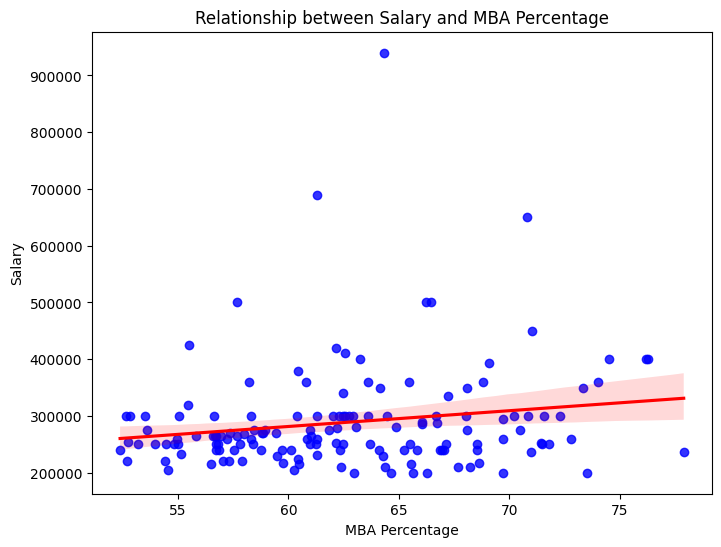

In [14]:
# Scatterplot with trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='mba_p', y='salary', data=df_with_salary, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship between Salary and MBA Percentage')
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.show()

In [48]:
#Salary and MBA has a positive relationship with 18%
#Student Who got more percentage in mba_p, get more salary

### 5.Which specialization is getting minimum salary?

In [15]:
df_with_salary = dataset[dataset['salary'] > 0]
min_salary_by_specialisation = df_with_salary.groupby('specialisation')['salary'].min()
print("Minimum salary for each specialization:")
print(min_salary_by_specialisation)

Minimum salary for each specialization:
specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64


### 6.How many of them getting above 500000 salary?

In [16]:
df_with_salary = dataset[dataset['salary'] >500000]
df_with_salary

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
119,120,60.8,68.40,64.6,82.66,64.34,940000.0,M,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
150,151,71.0,58.66,58.0,56.00,61.30,690000.0,M,Central,Central,Science,Sci&Tech,Yes,Mkt&Fin,Placed
177,178,73.0,97.00,79.0,89.00,70.81,650000.0,F,Central,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


### 7.Test the Analysis of Variance between etest_p and mba_p at signifance
 level 5%.(Make decision using Hypothesis Testing)

In [17]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

In [ ]:
#Hyothesis testing
#Reject null hypothesis if p_value<0.05 
#In above testing ,pvalue is 46% so it reject alternate hypothesis and accepted the null hypothesis
#Also found that there is a good relation between etest_p and mba_p

### 8.Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [18]:
from scipy.stats import ttest_ind
#dataset=dataset.dropna()
t=dataset[dataset["degree_t"]=='Sci&Tech']["salary"]
t1=dataset[dataset["specialisation"]=='Mkt&Fin']["salary"]
ttest_ind(t,t1)

TtestResult(statistic=np.float64(-0.7080678211254382), pvalue=np.float64(0.479834521562557), df=np.float64(177.0))

In [19]:
#Hyothesis testing
#Reject null hypothesis if p_value<0.05 
#In above testing ,pvalue is 47% so it reject alternate hypothesis and accepted the null hypothesis
#both degree_t and specialisation have no relation with salary because its statistic is with negative value

### 9.Convert the normal distribution to standard normal distribution for salary column

In [20]:
standard_deviation=dataset["salary"].std()
standard_deviation

np.float64(154780.92671560097)

In [21]:
#Coverted to standard Normal Distribution
def stdNBgraph(dataset):
    #Calculate the Mean and Standard Deviation
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]
#Plotting Z-Score Distribution
    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20004\3437343032.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


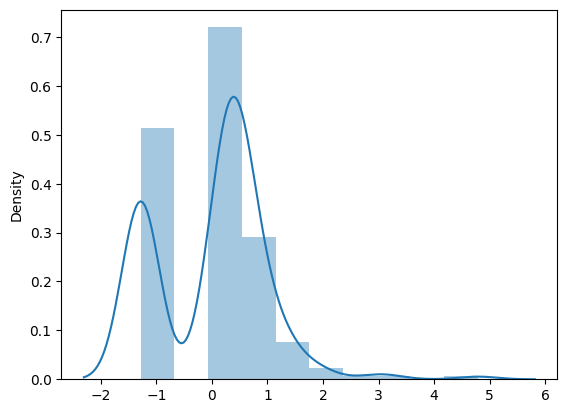

In [22]:
stdNBgraph(dataset["salary"])

### 10.What is the probability Density Function of the salary range from 700000 to 900000?

In [23]:
#finding probability by the given range
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Hp\AppData\Local\Temp\ipykernel_20004\432798856.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

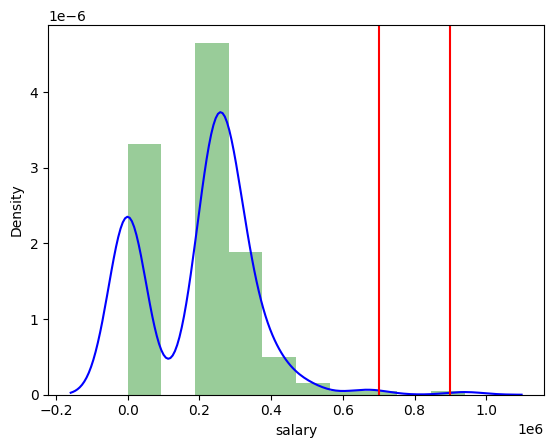

In [24]:
get_pdf_probability(dataset["salary"],700000,900000)

### 11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [25]:
from scipy.stats import ttest_ind
#dataset=dataset.dropna()
t=dataset[dataset["degree_t"]=='Sci&Tech']["etest_p"]
t1=dataset[dataset["specialisation"]=='Mkt&Fin']["mba_p"]
ttest_ind(t,t1)

TtestResult(statistic=np.float64(6.401466757728015), pvalue=np.float64(1.3375985179873404e-09), df=np.float64(177.0))

In [26]:
#Hyothesis testing
#Reject null hypothesis if p_value<0.05 
#In above testing ,pvalue is 47% so it reject alternate hypothesis and accepted the null hypothesis
#It has positive correlation within the column degree with etest_p and specialisation with mba_p

### 12.Which parameter is highly correlated with salary?

In [27]:
#correlation calculation
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [ ]:
#ssc_p has the highest correlation with salary, with a correlation value of approximately 0.538.

### 13.plot any useful graph and explain it

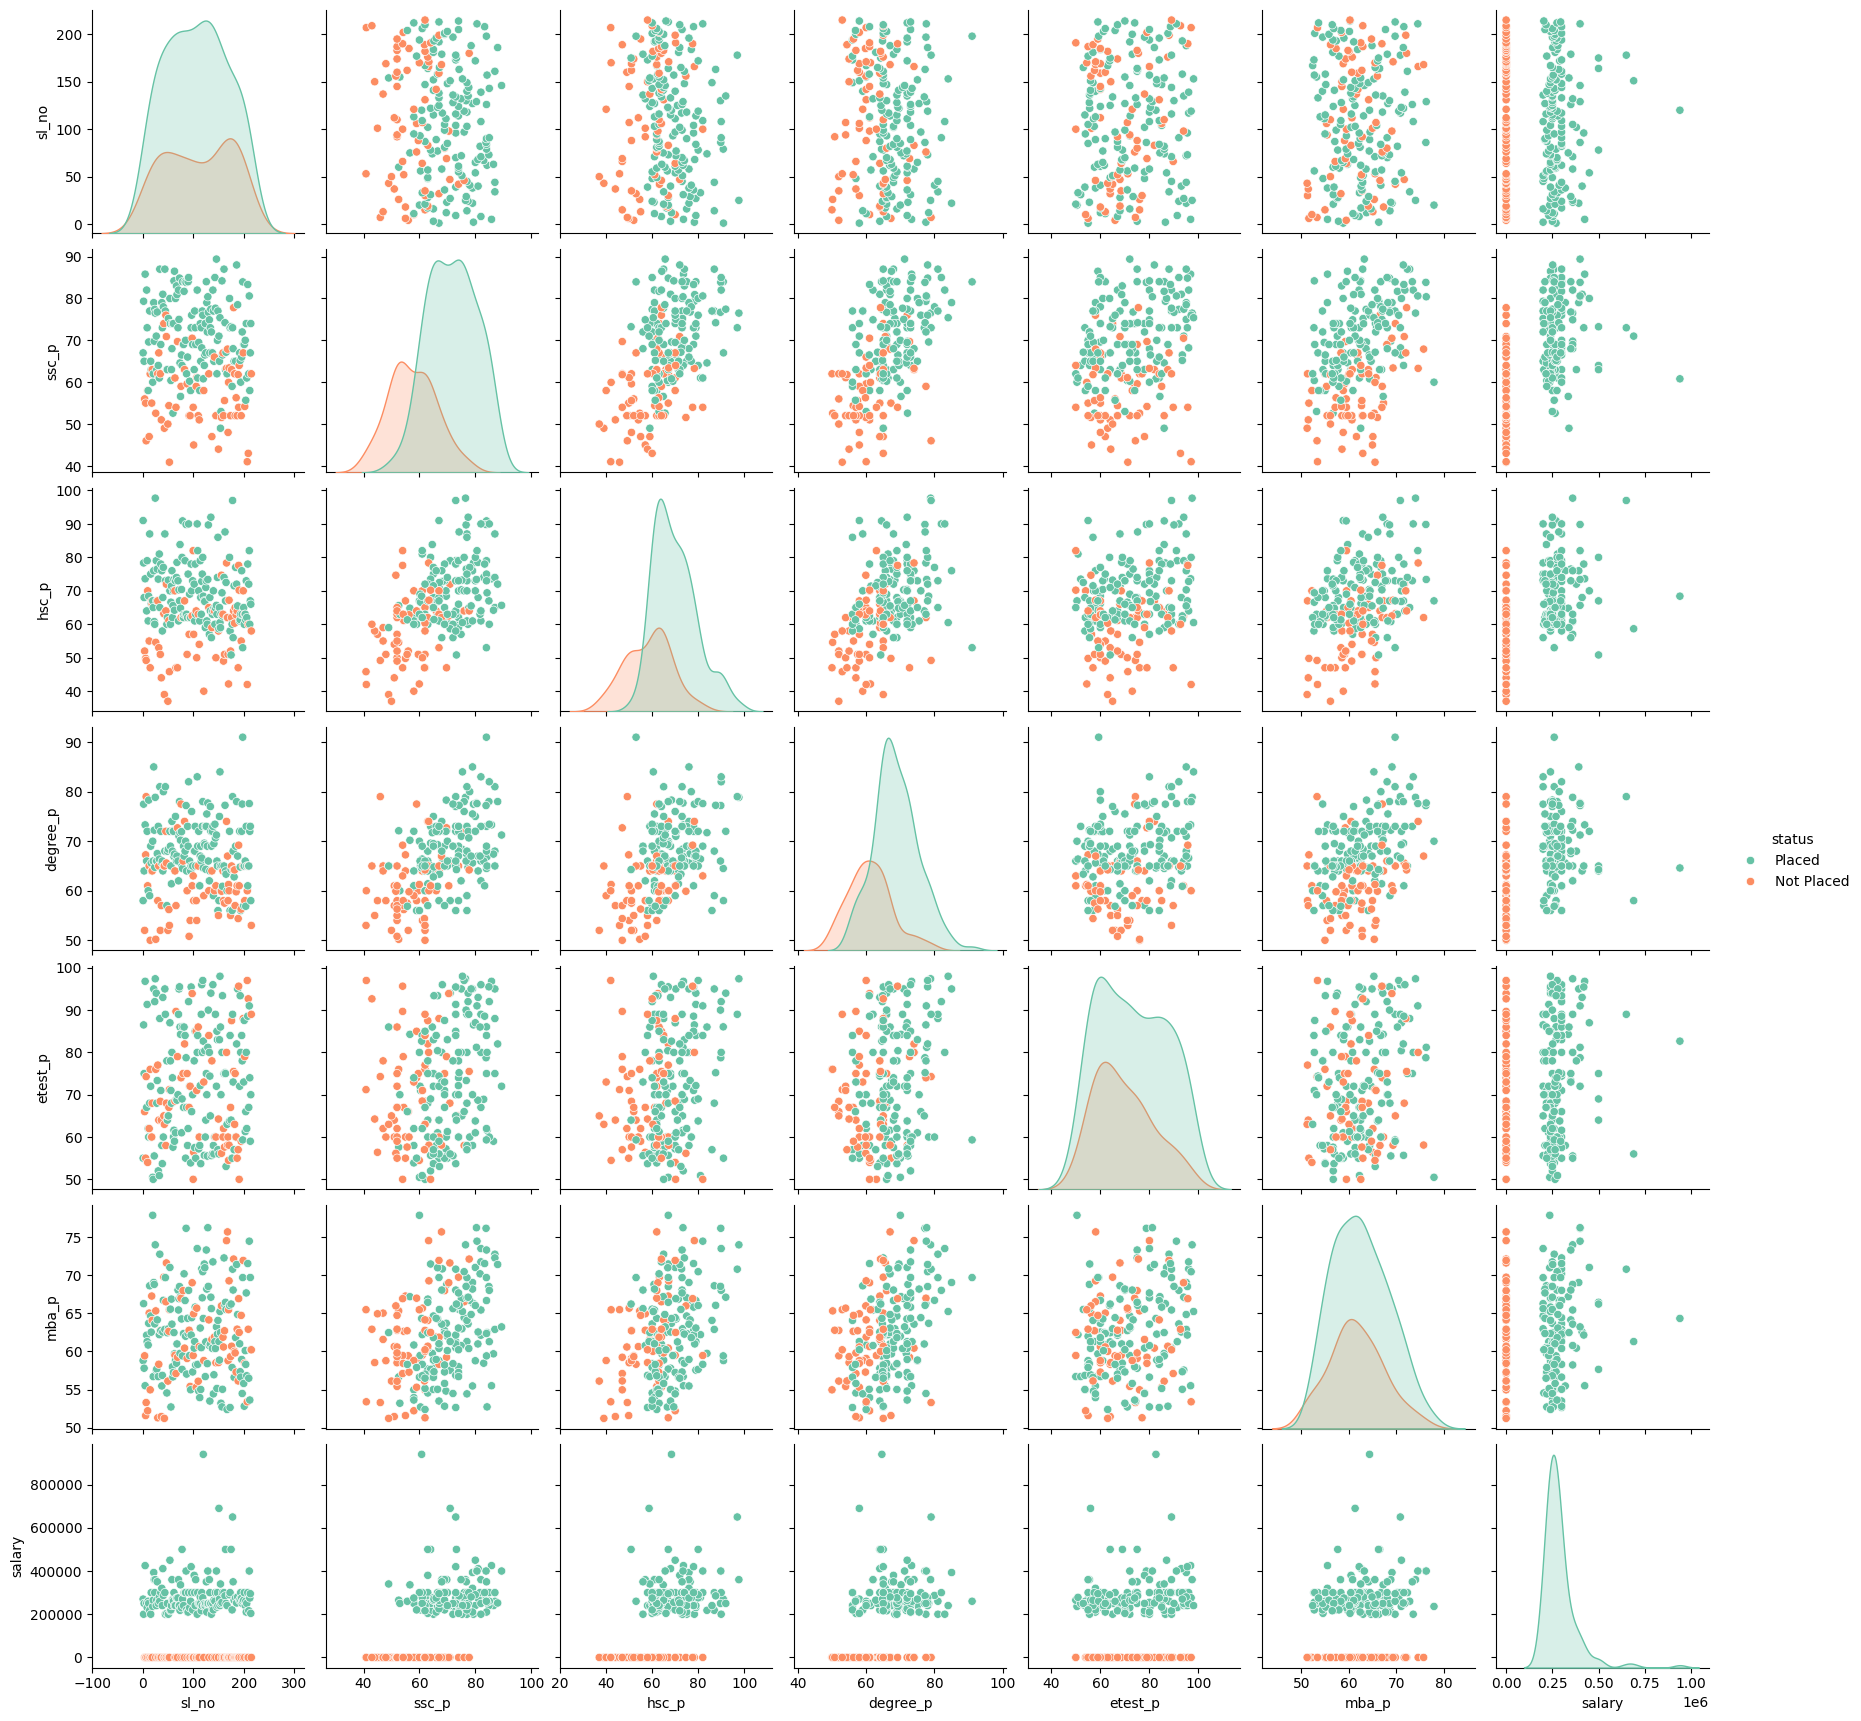

In [28]:
sns.pairplot(dataset, hue='status', diag_kind='kde', palette='Set2')
# By using seaborn, plotted the pairplot for each columns. IT compare each columns with its respective remaining columns.
# Here the green colour indicate the placed people data and orange denote the not placed people data.
